In [2]:
# !pip install -y graphviz
# !conda install -y graphviz

In [282]:
import warnings
warnings.filterwarnings("ignore")

In [283]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [285]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [286]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
# iris_df

### 와인 데이터

In [287]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
# wine_df

### 유방암 데이터

In [288]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
# cancer_df

## Regression 데이터

### 보스턴 주택 가격 데이터

In [289]:
boston = load_boston()

In [290]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
# boston_df

### 당뇨병 데이터

In [291]:
diabetes = load_diabetes()

In [292]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
# diabetes_df

## 분류 - `DecisionTreeClassifier()`

- `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
- 두개의 배열 x, y를 입력 받음
  - x는 [n_samples, n_features] 크기의 데이터 특성 배열
  - y는 [n_samples] 크기의 정답 배열

In [293]:
x = [[0, 0], [1, 1], [0.7, 0.7]]
# [x_1, x_2]
# [data_1, data_2, data_3]
y = [0, 1, 1]
# [y_1, y_2, y_3]
model = tree.DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [294]:
model.predict([[2., 2.]])

# input [2,2] -> 예측으로 [1]

array([1])

In [295]:
model.predict_proba([[2., 2.]])

# [0 class 에 속할 확률, 1 class에 속할 확률]

array([[0., 1.]])

In [299]:
r = tree.export_text(decision_tree=model,
                     feature_names=["X_1", "X_2"])
print(r)

|--- X_1 <= 0.35
|   |--- class: 0
|--- X_1 >  0.35
|   |--- class: 1



[Text(0.5, 0.75, 'X[0] <= 0.35\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

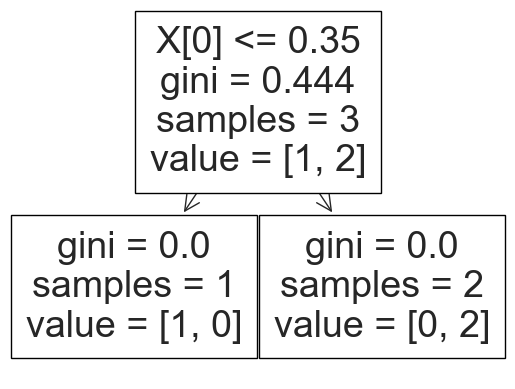

In [300]:
tree.plot_tree(model)

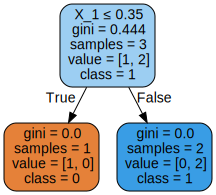

In [301]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = ["X_1", "X_2"],
                                class_names = ["0", "1"],
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 붓꽃 데이터 학습

#### 교차검증

#### StandardScaler를 용해 전처리 여부에 영향을 받는지 확인해 보자

##### 전처리 없이 학습

In [308]:
model = tree.DecisionTreeClassifier()

In [309]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y=iris.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [310]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeClassifier()
)

In [311]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y=iris.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

#### 학습된 결정 트리 시각화

In [314]:
model = tree.DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [315]:
r = tree.export_text(decision_tree=model,
                     feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

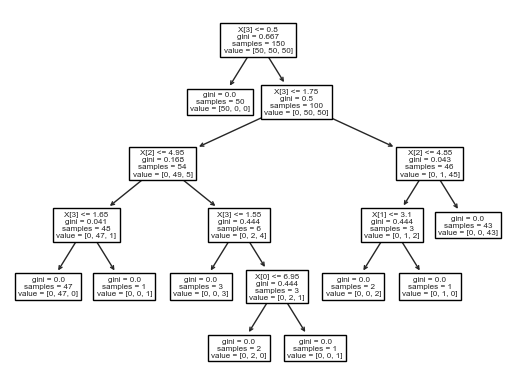

In [316]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [57]:
# https://graphviz.readthedocs.io/en/stable/examples.html

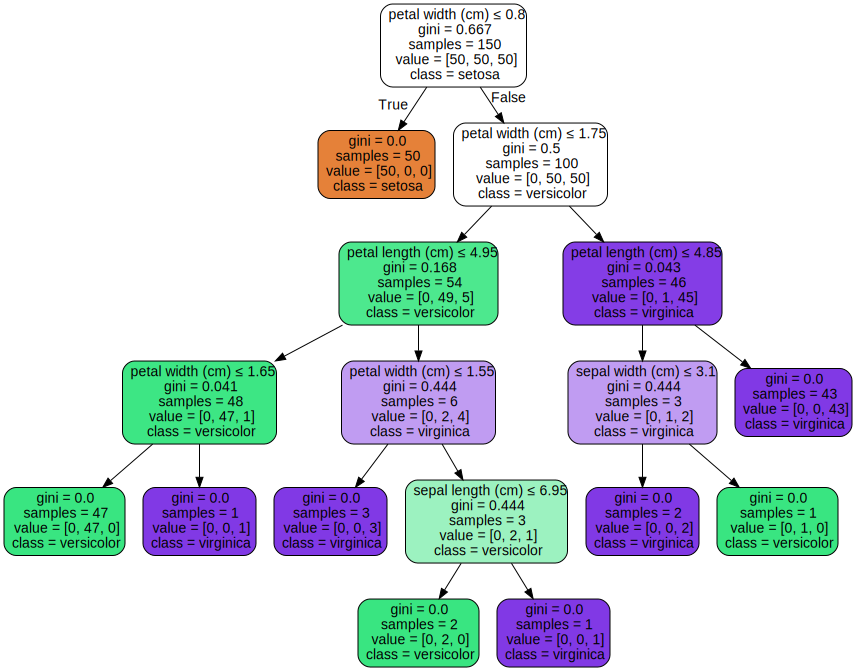

In [317]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [318]:
n_classes = 3
plot_colors = 'ryb'
plot_step=.02

##### 결정 경계 시각화

(0.0, 7.88, -0.9, 3.4800000000000044)

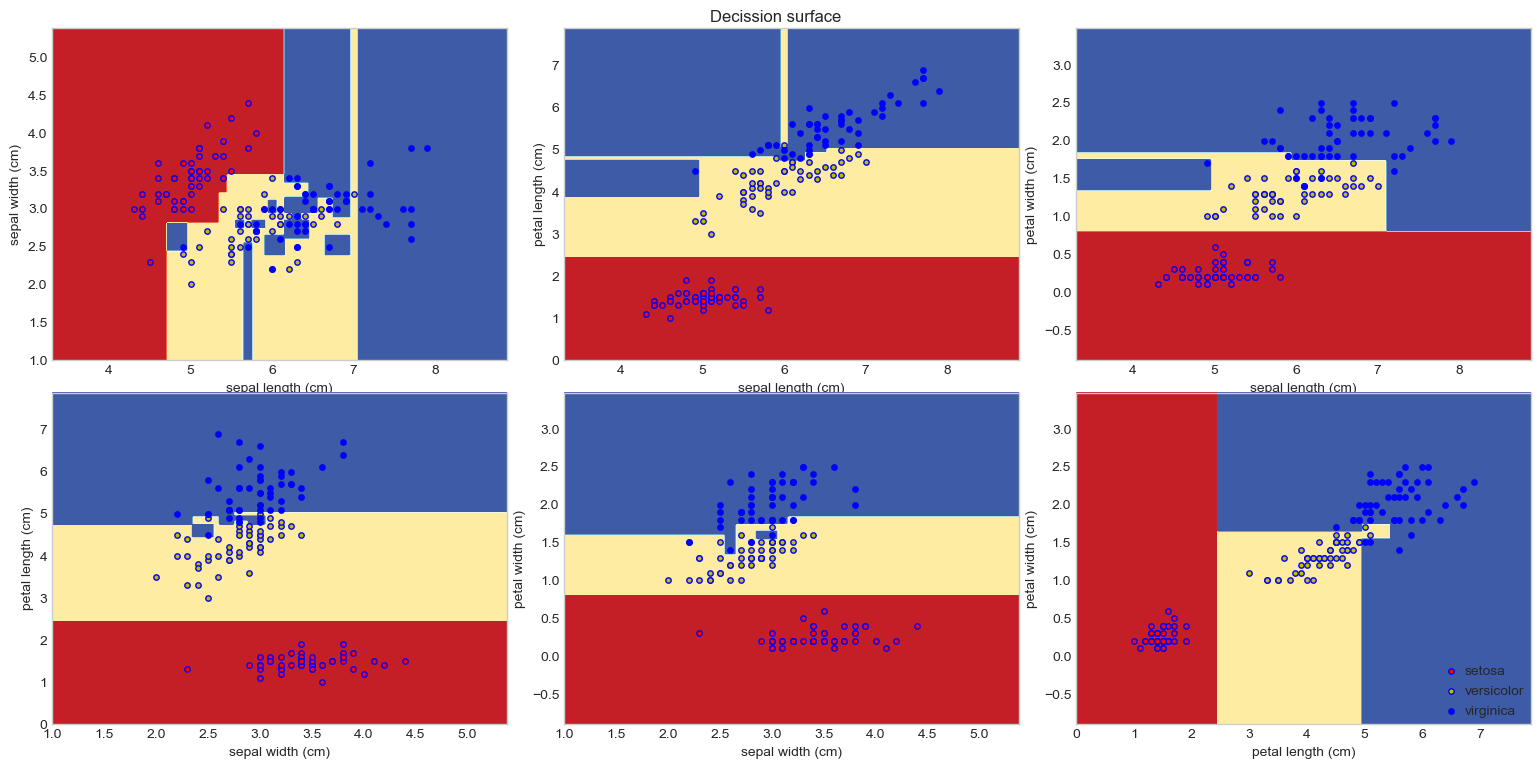

In [60]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### max_depth 변화에 따른 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

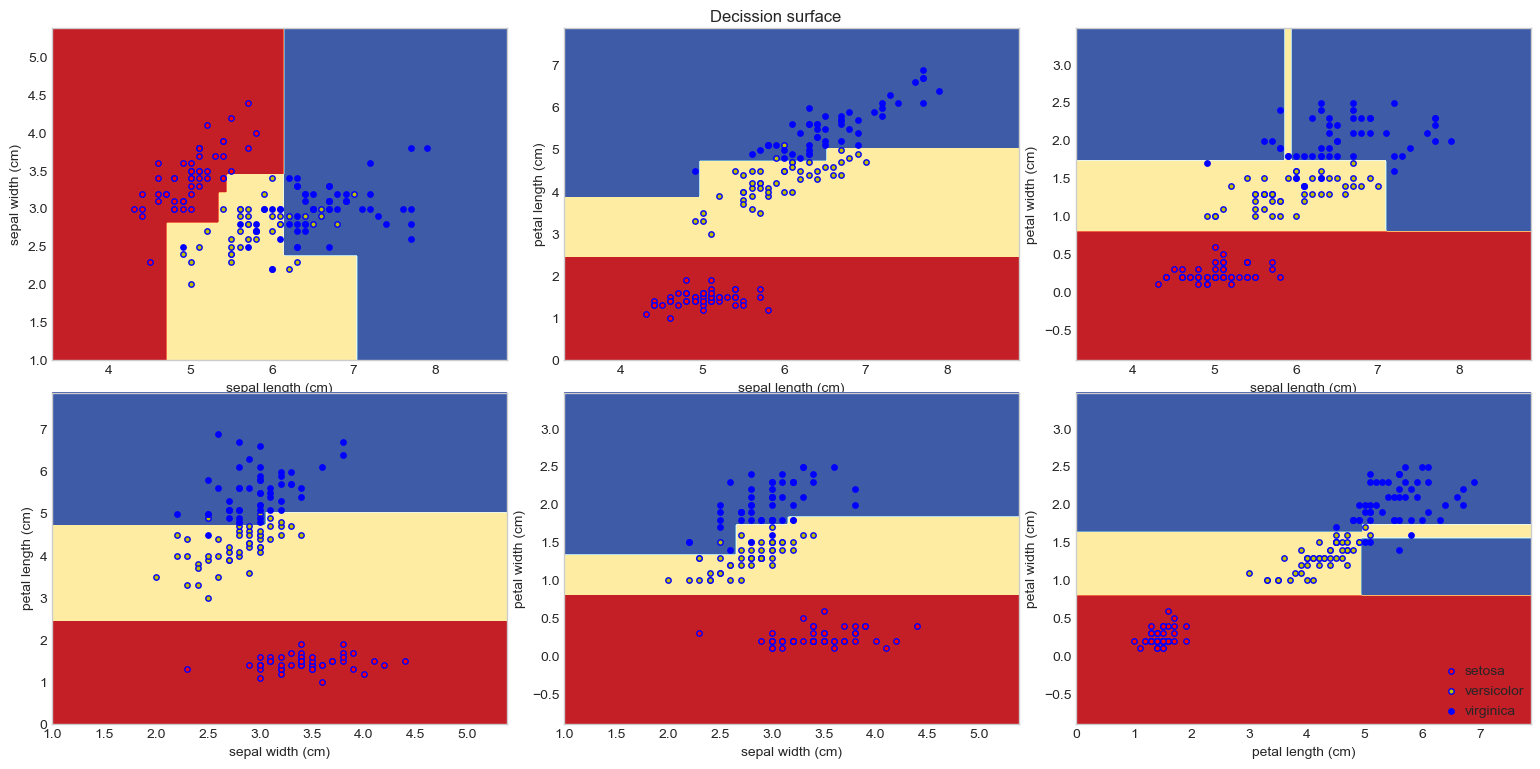

In [61]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier(max_depth=4) # max_depth를 설정해줌.
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 와인 데이터 학습

In [319]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### 교차 검증

##### 전처리 없이 학습

In [320]:
model = tree.DecisionTreeClassifier()

In [321]:
cross_val_score(estimator= model,
                cv = 5,
                X = wine.data, y = wine.target,
                n_jobs= multiprocessing.cpu_count()
                )

array([0.91666667, 0.88888889, 0.86111111, 0.91428571, 0.85714286])

##### 전처리 후 학습

In [322]:
model = make_pipeline(StandardScaler(),
                        tree.DecisionTreeClassifier()
                        )

In [323]:
cross_val_score(estimator= model,
                cv = 5,
                X = wine.data, y = wine.target,
                n_jobs= multiprocessing.cpu_count()
                )

array([0.94444444, 0.77777778, 0.83333333, 0.91428571, 0.85714286])

In [324]:
# 그리드로 해보기 -> 엔트로피가 더 좋다고 함.
from sklearn.model_selection import GridSearchCV

In [325]:
param_grid =[{"criterion":['gini', 'entropy'],
              "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
              "max_depth":[2, 3, 4, 5, 6, None],
              "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10],
}]

In [327]:
gs = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

In [328]:
gs.fit(wine.data, wine.target)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, None],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             verbose=True)

In [329]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3)

#### 학습된 결정 트리 시각화

In [330]:
model = gs.best_estimator_
model.fit(wine.data, wine.target)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3)

##### 텍스트를 통한 시각화

In [331]:
r = tree.export_text(decision_tree= model,
                    feature_names=wine.feature_names)
print(r)

|--- flavanoids <= 1.58
|   |--- color_intensity <= 3.82
|   |   |--- class: 1
|   |--- color_intensity >  3.82
|   |   |--- ash <= 2.17
|   |   |   |--- class: 2
|   |   |--- ash >  2.17
|   |   |   |--- class: 2
|--- flavanoids >  1.58
|   |--- proline <= 724.50
|   |   |--- alcohol <= 13.17
|   |   |   |--- class: 1
|   |   |--- alcohol >  13.17
|   |   |   |--- class: 1
|   |--- proline >  724.50
|   |   |--- color_intensity <= 3.46
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.46
|   |   |   |--- class: 0



##### plot_tree를 사용한 시각화

[Text(0.4230769230769231, 0.875, 'X[6] <= 1.575\nentropy = 1.567\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.15384615384615385, 0.625, 'X[9] <= 3.825\nentropy = 0.771\nsamples = 62\nvalue = [0, 14, 48]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.23076923076923078, 0.375, 'X[2] <= 2.17\nentropy = 0.144\nsamples = 49\nvalue = [0, 1, 48]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 46\nvalue = [0, 0, 46]'),
 Text(0.6923076923076923, 0.625, 'X[12] <= 724.5\nentropy = 1.0\nsamples = 116\nvalue = [59, 57, 0]'),
 Text(0.5384615384615384, 0.375, 'X[0] <= 13.175\nentropy = 0.133\nsamples = 54\nvalue = [1, 53, 0]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.8461538461538461, 0.375, 'X[9] <= 3.46\nentropy

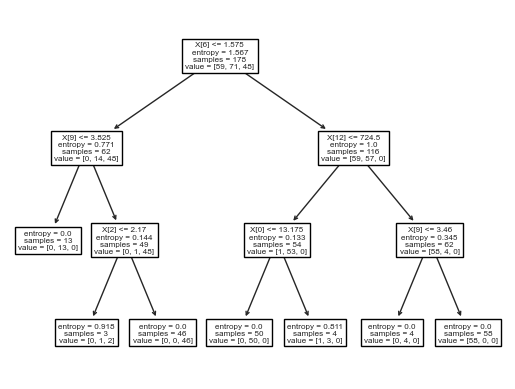

In [332]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

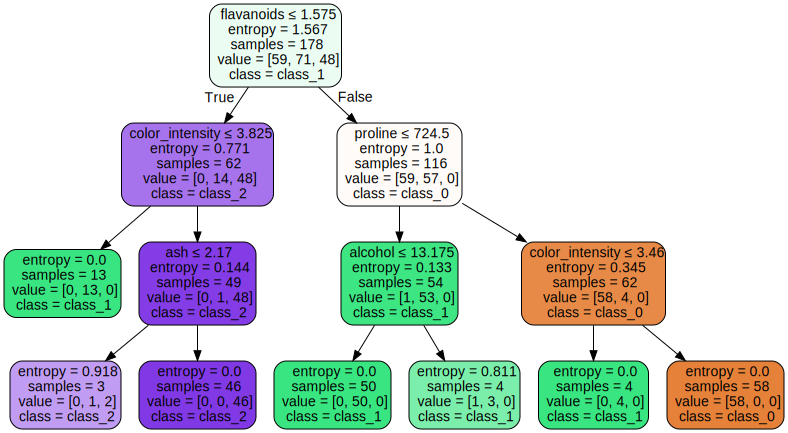

In [333]:
dot_data = tree.export_graphviz(decision_tree= model,
                                feature_names= wine.feature_names,
                                class_names= wine.target_names,
                                filled= True, rounded= True,
                                special_characters= True
                                )
graph = graphviz.Source(dot_data)
graph

시각화

In [334]:
n_classes = 3
plot_colors = 'ryb'
plot_step = .02

##### 결정 경계 시각화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

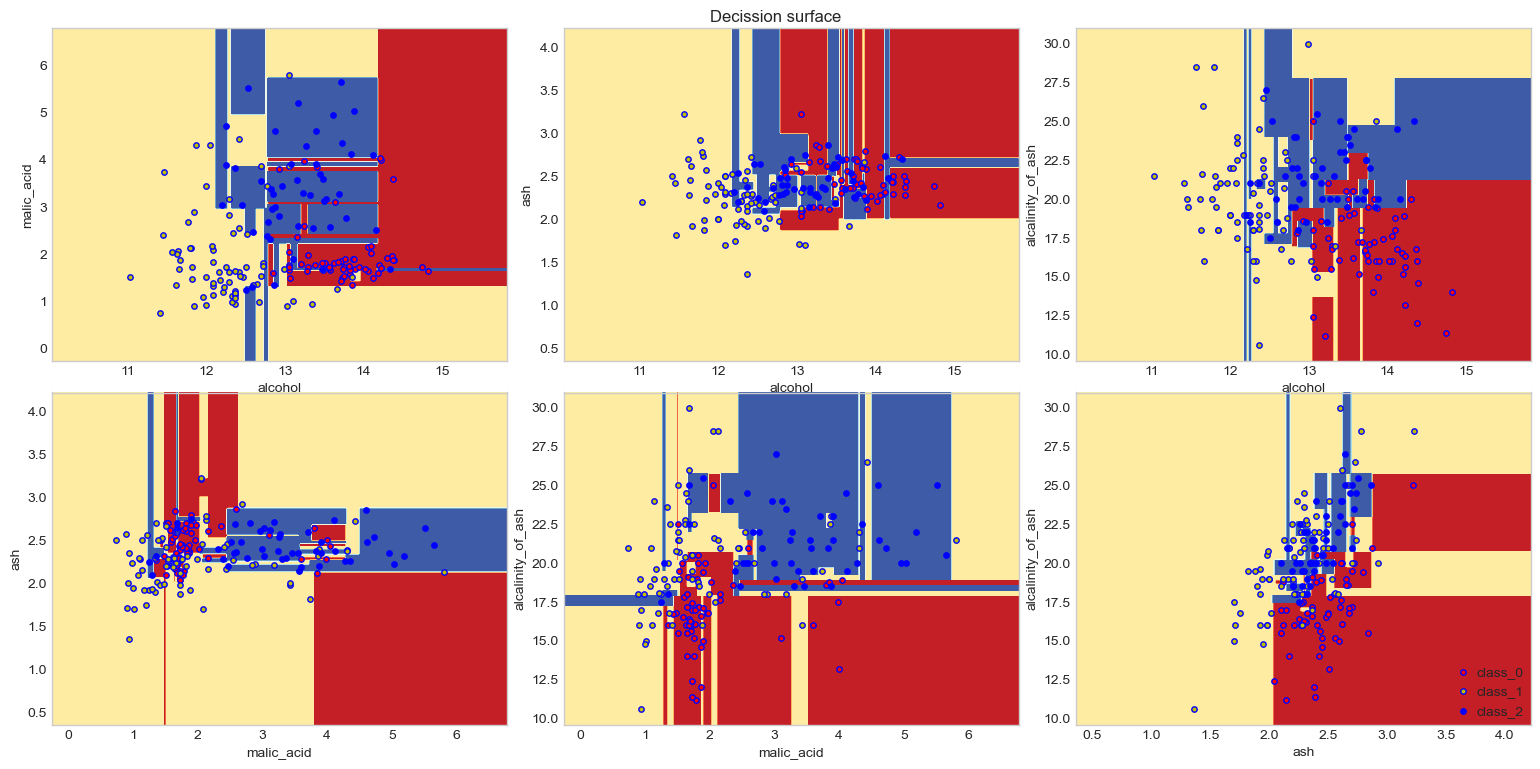

In [236]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = wine.data[:, pair]
  y = wine.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### max_depth 변화에 따른 결정 경계의 변화 확인

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

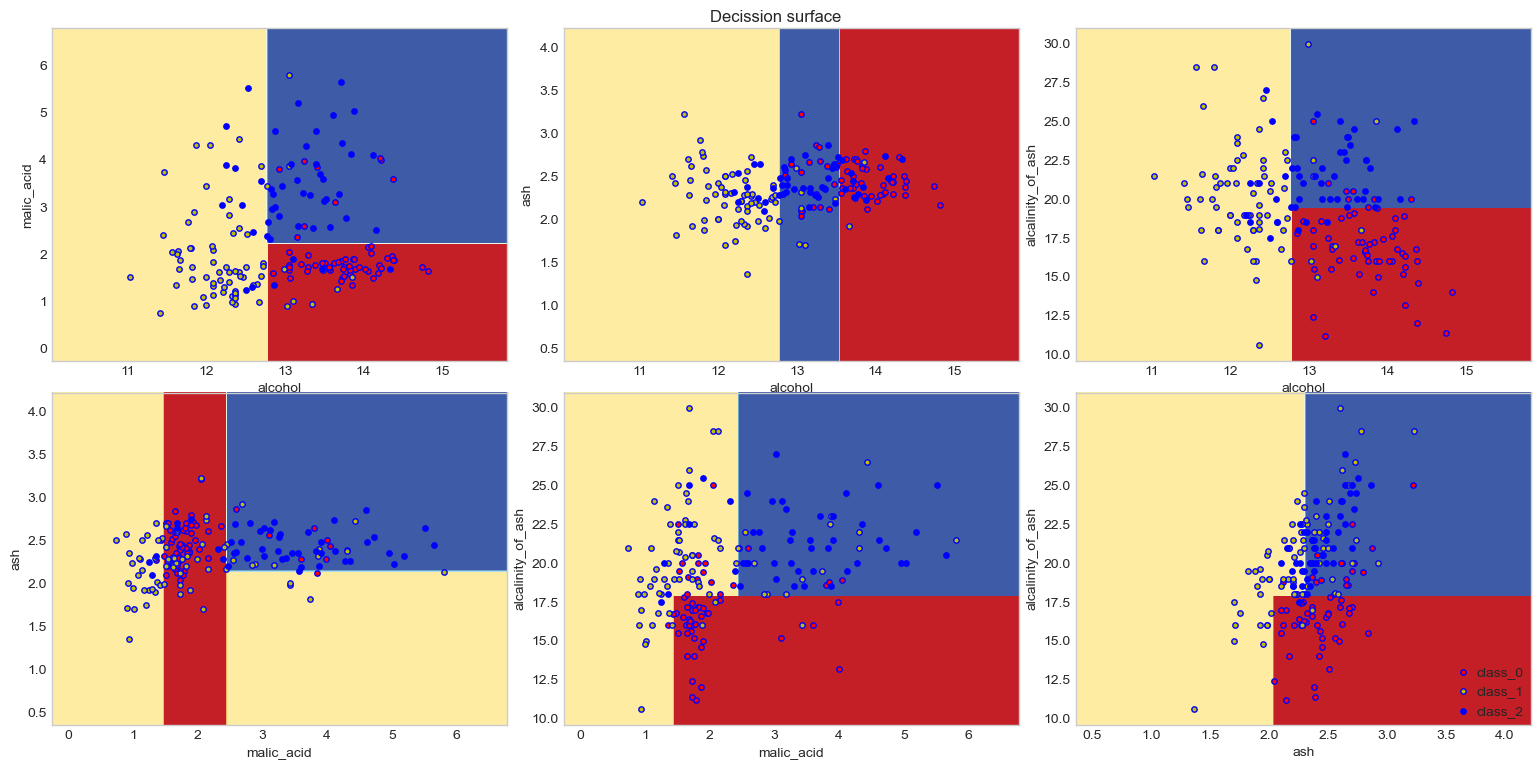

In [237]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = wine.data[:, pair]
  y = wine.target

  model = tree.DecisionTreeClassifier(max_depth=2)
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 유방암 데이터 학습

In [335]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### 교차 검증

##### 전처리 없이 학습

In [336]:
model = tree.DecisionTreeClassifier()

In [337]:
cross_val_score(estimator=model,
                cv=5,
                X=cancer.data, y=cancer.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.9122807 , 0.90350877, 0.92105263, 0.94736842, 0.90265487])

##### 전처리 후 학습

In [338]:
model = make_pipeline(StandardScaler(), tree.DecisionTreeClassifier())

In [340]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y=iris.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [341]:
param_grid =[{"criterion":['gini', 'entropy'],
              "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
              "max_depth":[2, 3, 4, 5, 6, None],
              "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10],
}]
gs = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)


In [342]:
gs.fit(cancer.data, cancer.target)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, None],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             verbose=True)

In [343]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5)

#### 학습된 결정 트리 시각화

In [344]:
model = gs.best_estimator_
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5)

##### 텍스트를 통한 시각화

In [346]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [347]:
r = tree.export_text(decision_tree= model)
# feature_names= cancer.feature_names)  <- 왜 인지 넣으면 안됨.
print(r)

|--- feature_22 <= 105.95
|   |--- feature_27 <= 0.14
|   |   |--- feature_13 <= 46.90
|   |   |   |--- feature_21 <= 30.15
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  30.15
|   |   |   |   |--- feature_20 <= 14.43
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_20 >  14.43
|   |   |   |   |   |--- class: 1
|   |   |--- feature_13 >  46.90
|   |   |   |--- class: 1
|   |--- feature_27 >  0.14
|   |   |--- feature_21 <= 27.58
|   |   |   |--- feature_28 <= 0.36
|   |   |   |   |--- class: 1
|   |   |   |--- feature_28 >  0.36
|   |   |   |   |--- class: 0
|   |   |--- feature_21 >  27.58
|   |   |   |--- class: 0
|--- feature_22 >  105.95
|   |--- feature_22 <= 117.45
|   |   |--- feature_24 <= 0.14
|   |   |   |--- feature_21 <= 25.67
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  25.67
|   |   |   |   |--- feature_29 <= 0.07
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_29 >  0.07
|   |   |   |   |   |--- class: 1
|   |   

##### plot_tree를 사용한 시각화

[Text(0.5131578947368421, 0.9166666666666666, 'X[22] <= 105.95\nentropy = 0.953\nsamples = 569\nvalue = [212, 357]'),
 Text(0.2631578947368421, 0.75, 'X[27] <= 0.135\nentropy = 0.283\nsamples = 345\nvalue = [17, 328]'),
 Text(0.15789473684210525, 0.5833333333333334, 'X[13] <= 46.9\nentropy = 0.097\nsamples = 320\nvalue = [4, 316]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[21] <= 30.145\nentropy = 0.055\nsamples = 315\nvalue = [2, 313]'),
 Text(0.05263157894736842, 0.25, 'entropy = 0.0\nsamples = 273\nvalue = [0, 273]'),
 Text(0.15789473684210525, 0.25, 'X[20] <= 14.43\nentropy = 0.276\nsamples = 42\nvalue = [2, 40]'),
 Text(0.10526315789473684, 0.08333333333333333, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.21052631578947367, 0.08333333333333333, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.21052631578947367, 0.4166666666666667, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3684210526315789, 0.5833333333333334, 'X[21] <= 27.575\nentropy = 

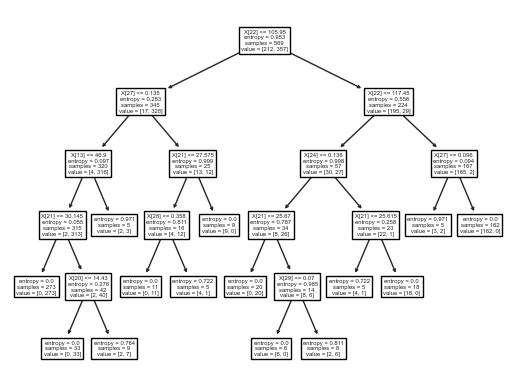

In [348]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

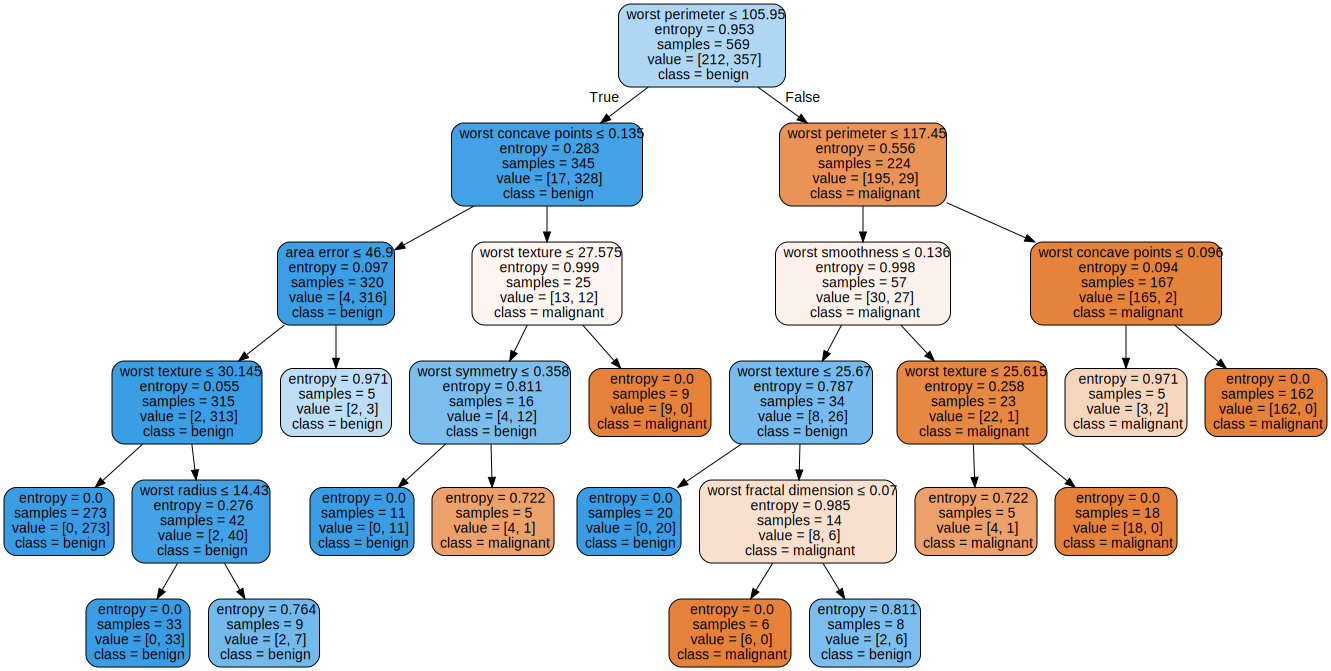

In [349]:
dot_data = tree.export_graphviz(decision_tree= model,
                                feature_names= cancer.feature_names,
                                class_names= cancer.target_names,
                                filled= True, rounded= True,
                                special_characters= True                         
                                 )
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [247]:
n_classes = 2
plot_colors = 'ryb' #빨노파
plot_step=.02

##### 결정 경계 시각화

(42.79, 189.49000000002292, 142.5, 2501.980000001207)

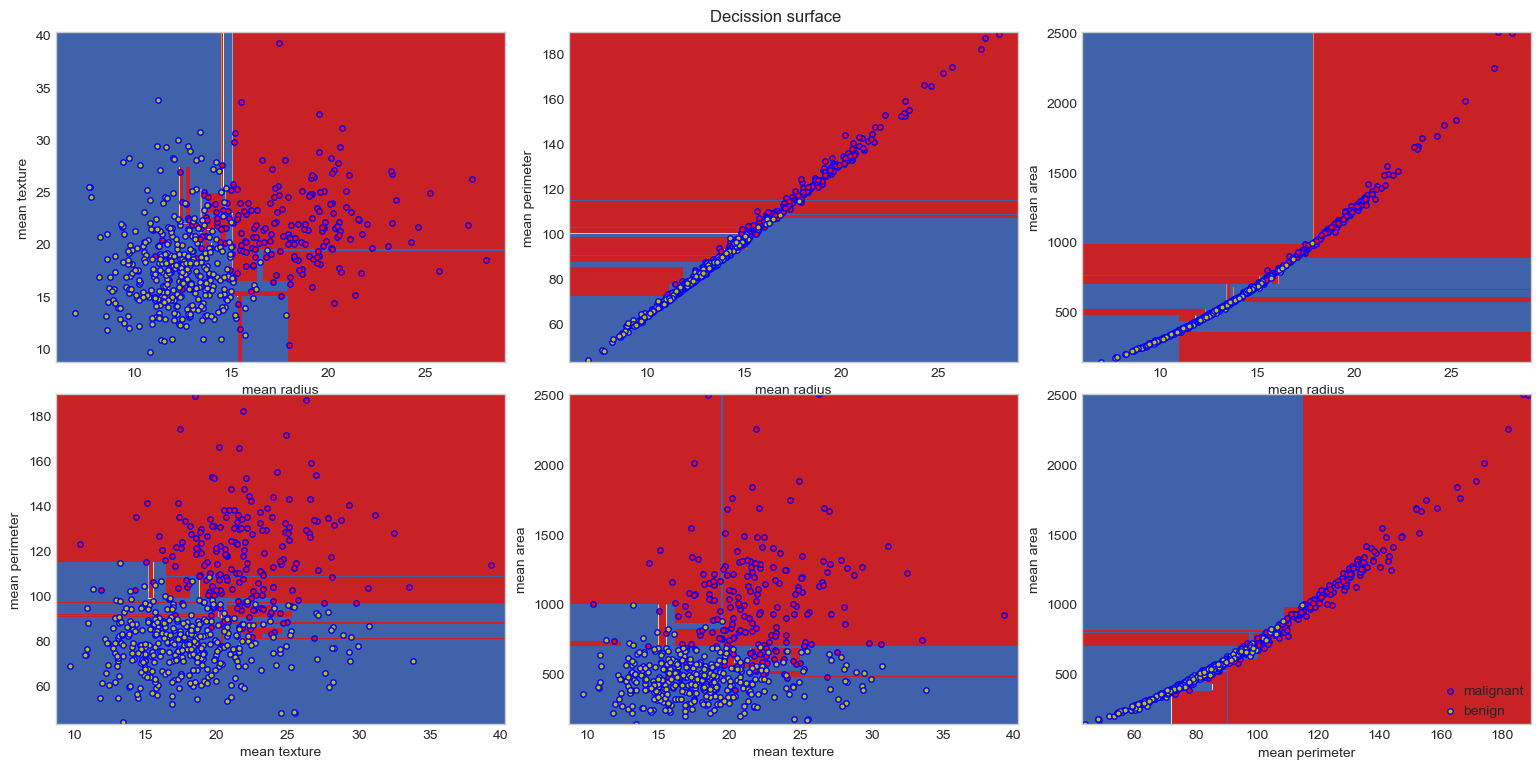

In [181]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = cancer.data[:, pair]
  y = cancer.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(42.79, 189.49000000002292, 142.5, 2501.980000001207)

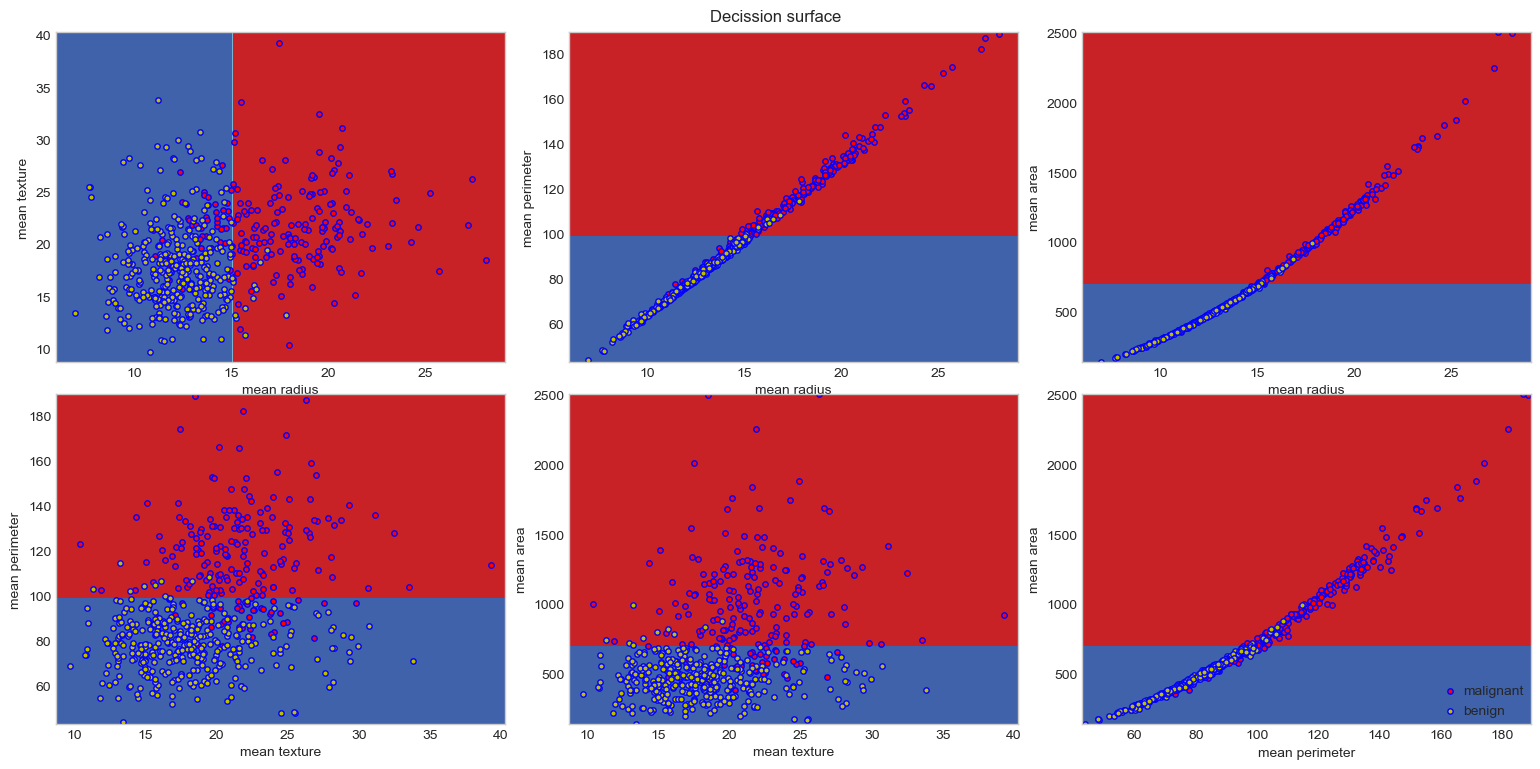

In [248]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = cancer.data[:, pair]
  y = cancer.target

  model = tree.DecisionTreeClassifier(max_depth=2)
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [350]:
model = tree.DecisionTreeRegressor()

In [351]:
cross_val_score(estimator=model,
                X=boston.data, y = boston.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

array([ 0.6182837 ,  0.59954157,  0.61195393,  0.4330897 , -1.78578397])

##### 전처리 후 학습

In [352]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeRegressor()
)

In [353]:
cross_val_score(estimator=model,
                X=boston.data, y = boston.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

array([ 0.66602982,  0.61589444,  0.59409097,  0.43511591, -1.51611294])

#### 학습된 결정 트리 시각화

In [354]:
model = tree.DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [355]:
print(tree.export_text(model))

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 384.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_11 >  384.05
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |--- 

##### plot_tree를 사용한 시각화

[Text(0.6782897272303893, 0.975, 'X[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.4226607853295402, 0.925, 'X[12] <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.18914377491046672, 0.875, 'X[7] <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.10741736223428835, 0.825, 'X[12] <= 10.83\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.10556893339879853, 0.775, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.10926579106977818, 0.775, 'squared_error = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.2708701875866451, 0.825, 'X[5] <= 6.543\nsquared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(0.11296264874075786, 0.775, 'X[12] <= 7.57\nsquared_error = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(0.041791820702402956, 0.725, 'X[9] <= 222.5\nsquared_error = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(0.039943391866913126, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(

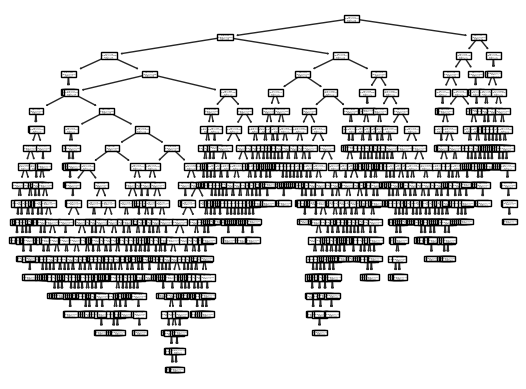

In [356]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

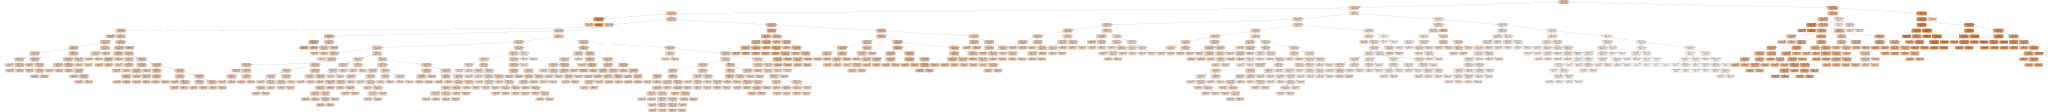

In [55]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = boston.feature_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

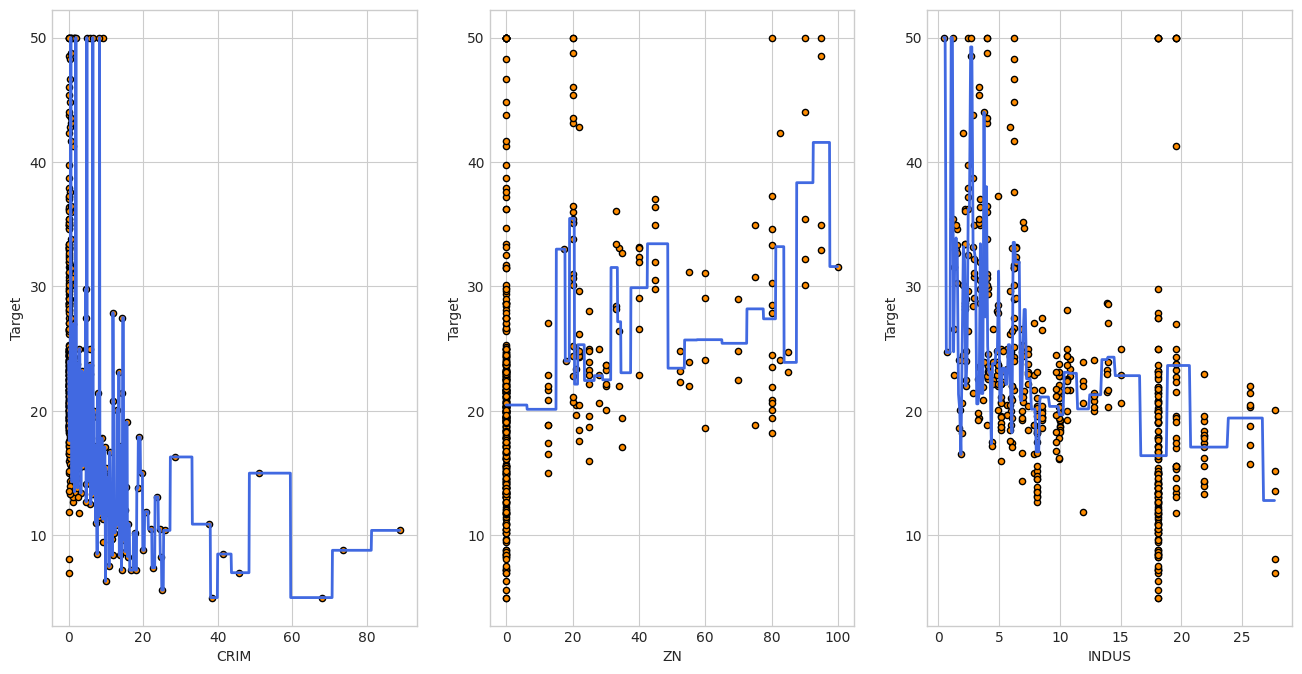

In [56]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  x = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = tree.DecisionTreeRegressor()
  model = model.fit(x, y)

  x_test = np.arange(min(x), max(x), 0.1)[:, np.newaxis]
  predict = model.predict(x_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(x, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(x_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

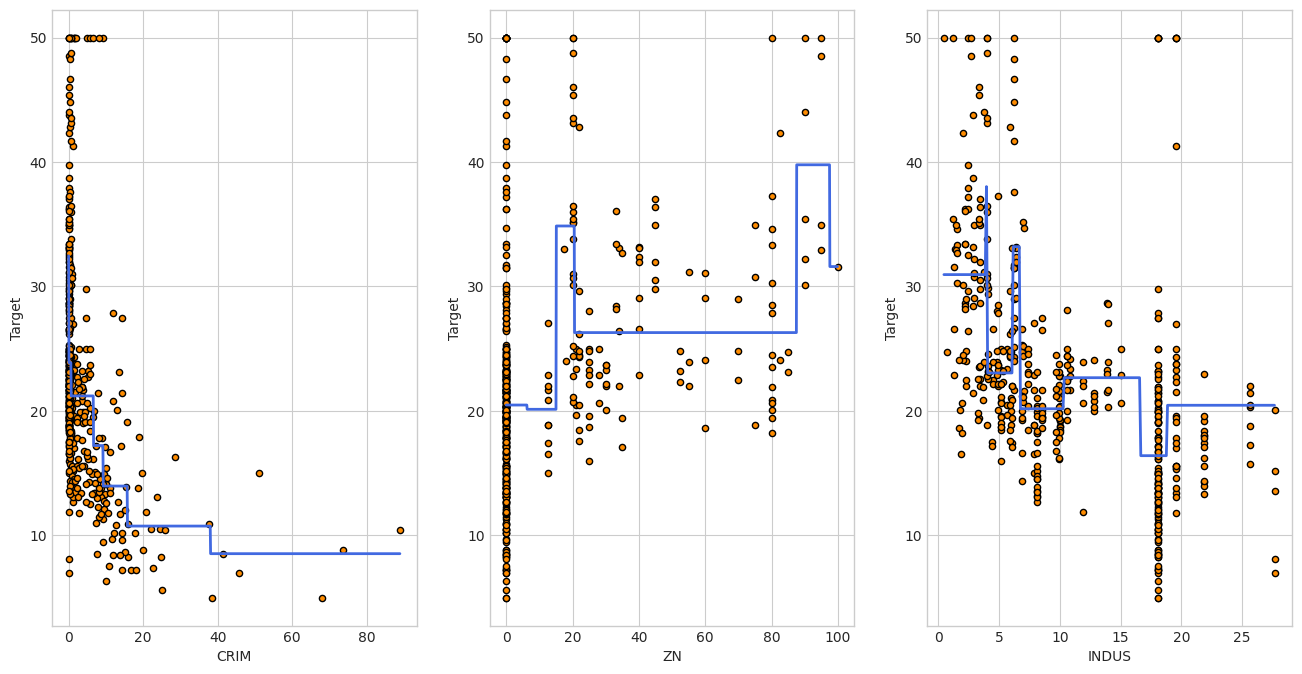

In [57]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  x = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = tree.DecisionTreeRegressor(max_depth=3)
  model = model.fit(x, y)

  x_test = np.arange(min(x), max(x), 0.1)[:, np.newaxis]
  predict = model.predict(x_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(x, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(x_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

##### 전처리 후 학습

#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

##### graphviz를 사용한 시각화

#### 시각화

##### 회귀식 시각화

##### max_depth 변화에 따른 시각화